<a href="https://colab.research.google.com/github/ShivarajChoutagi/COMP6208-ML-Assignment/blob/master/blood_transfusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport


In [91]:
data=pd.read_csv("/content/transfusion (2).data")

In [92]:
data

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [93]:
data.shape

(748, 5)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [95]:
data.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [96]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
743    False
744    False
745    False
746    False
747    False
Length: 748, dtype: bool

In [97]:
data.isna().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [98]:
data.corr()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
whether he/she donated blood in March 2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


In [99]:
data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


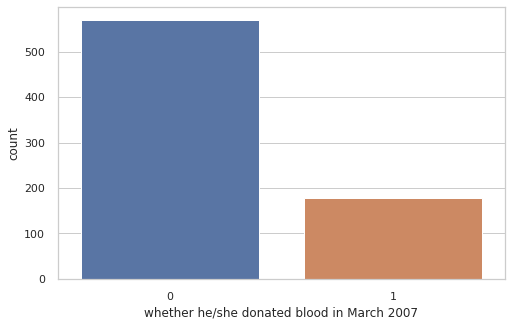

In [100]:
import seaborn as sns
# 0 means no, 1 - yes
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x= "whether he/she donated blood in March 2007",data=data)

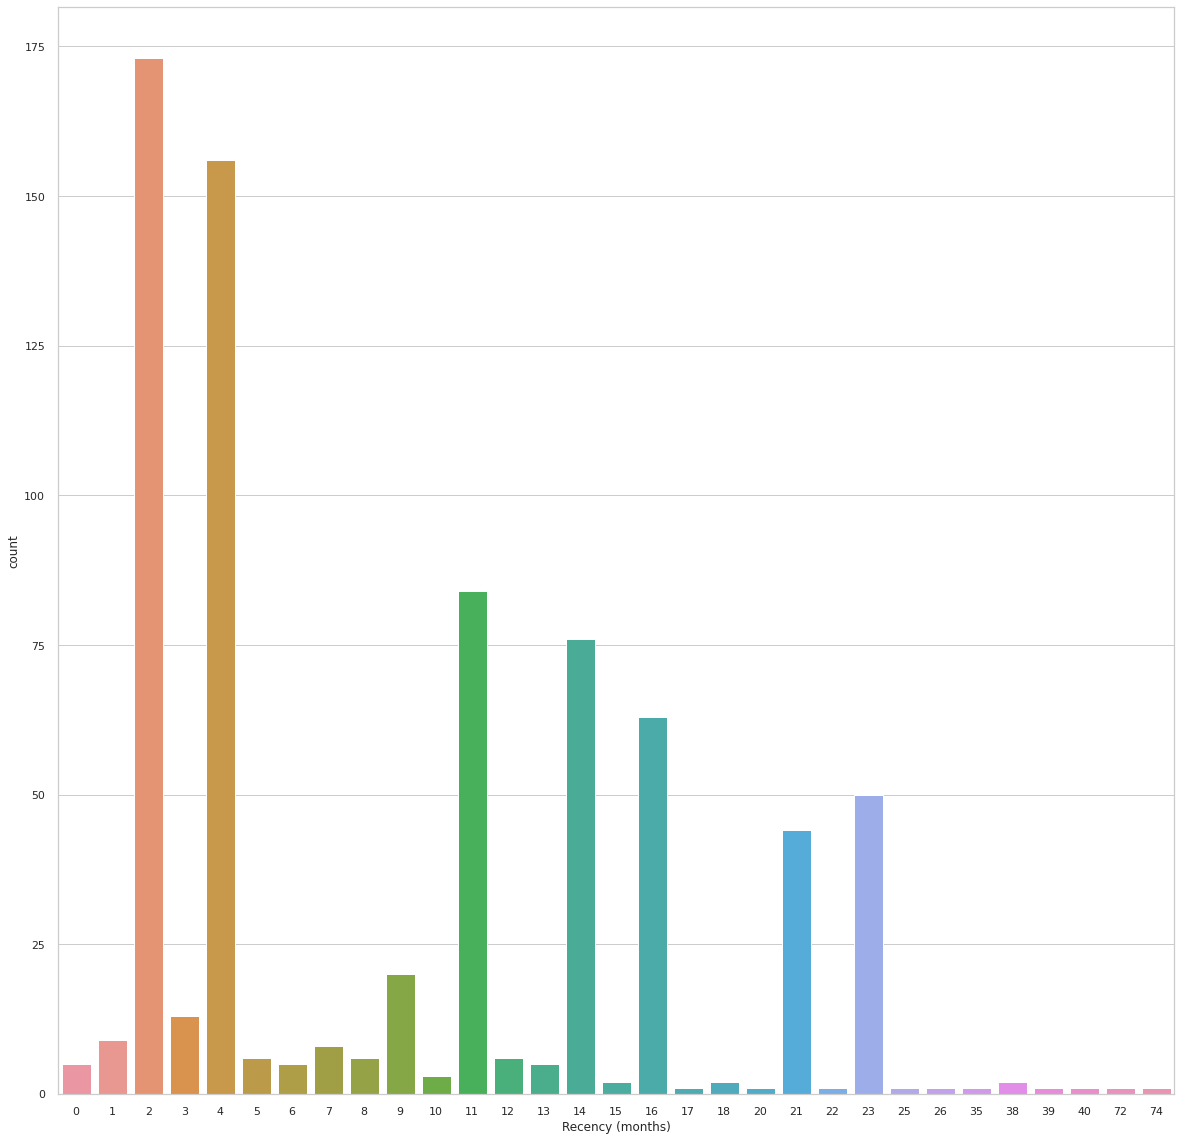

In [101]:
#count plot by month
plt.figure(figsize=(20,20))
sns.countplot(x="Recency (months)",data=data)

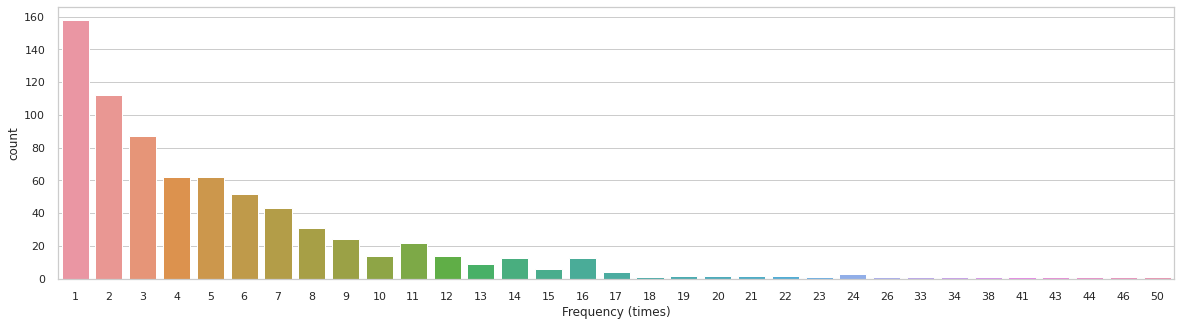

In [102]:
#count plot by month
plt.figure(figsize=(20,5))
sns.countplot(x="Frequency (times)",data=data)

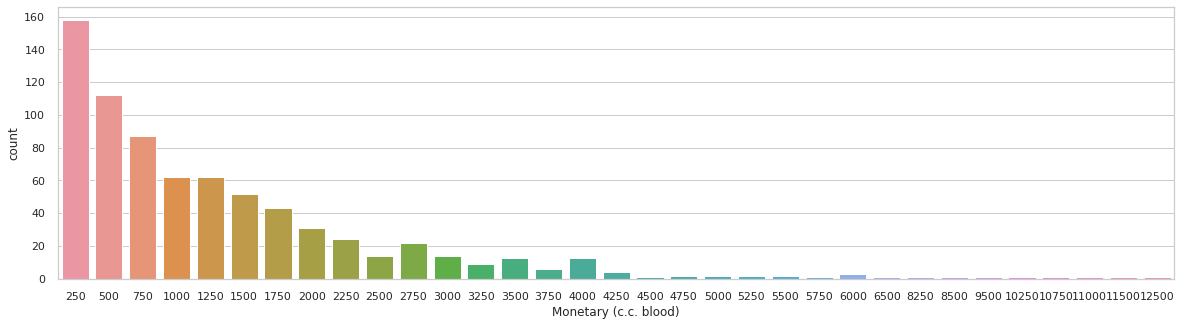

In [103]:
#count plot by month
plt.figure(figsize=(20,5))
sns.countplot(x="Monetary (c.c. blood)",data=data)

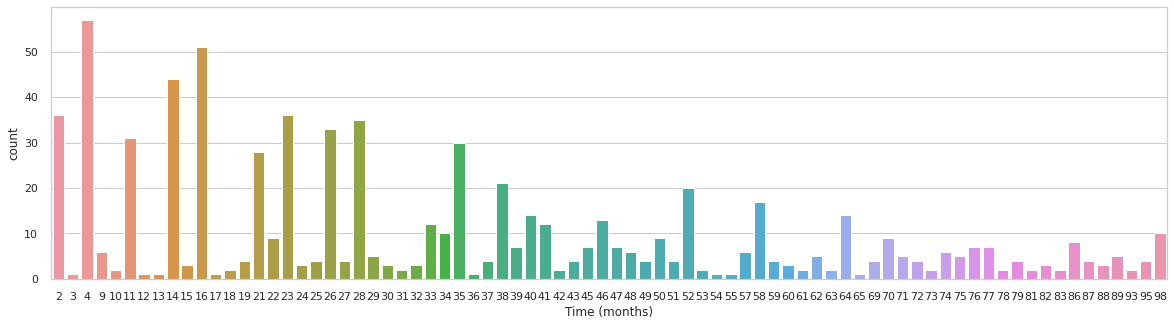

In [104]:
plt.figure(figsize=(20,5))
sns.countplot(x= "Time (months)",data=data)

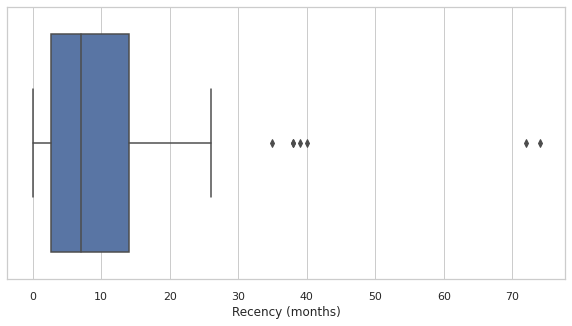

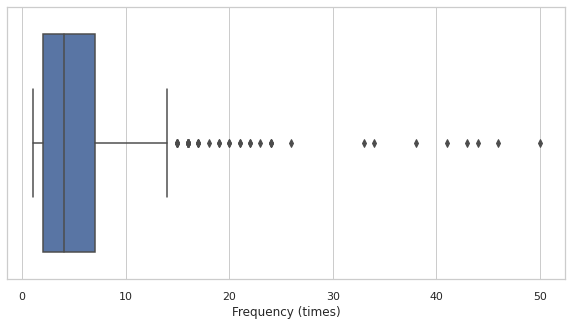

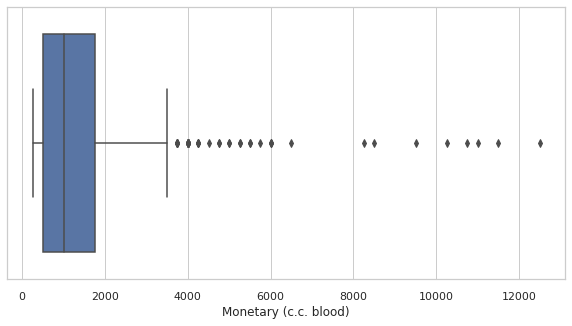

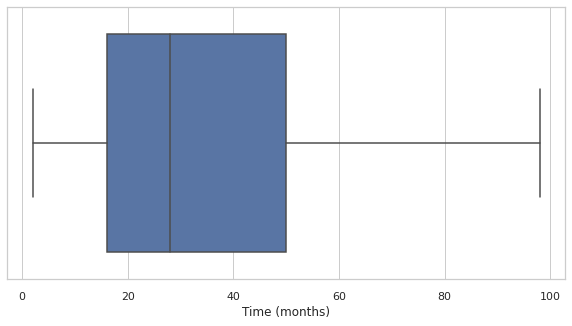

In [105]:
num_cols = data.columns
num_cols=num_cols[:-1]
for col in num_cols:
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(x=data[col])

In [118]:

def outliers_imputation_mild(data,column):
    IQR=data[column].quantile(0.75)-data[column].quantile(0.25)
    lower_fence=data[column].quantile(0.25)-(IQR*1.5)
    upper_fence=data[column].quantile(0.75)+(IQR*1.5)
    print("IQR:",IQR)
    print(f"Lower Fence {column}:",lower_fence)
    print(f"Upper Fence {column}:",upper_fence)
    print("____________________________________________")
    data.loc[data[column]<=lower_fence,column]=lower_fence
    data.loc[data[column]>=upper_fence,column]=upper_fence 

In [119]:
columns=X.columns

In [120]:
for col in columns:
    outliers_imputation_mild(X,col)

IQR: 11.25
Lower Fence Recency (months): -14.125
Upper Fence Recency (months): 30.875
____________________________________________
IQR: 5.0
Lower Fence Frequency (times): -5.5
Upper Fence Frequency (times): 14.5
____________________________________________
IQR: 1250.0
Lower Fence Monetary (c.c. blood): -1375.0
Upper Fence Monetary (c.c. blood): 3625.0
____________________________________________
IQR: 34.0
Lower Fence Time (months): -35.0
Upper Fence Time (months): 101.0
____________________________________________


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

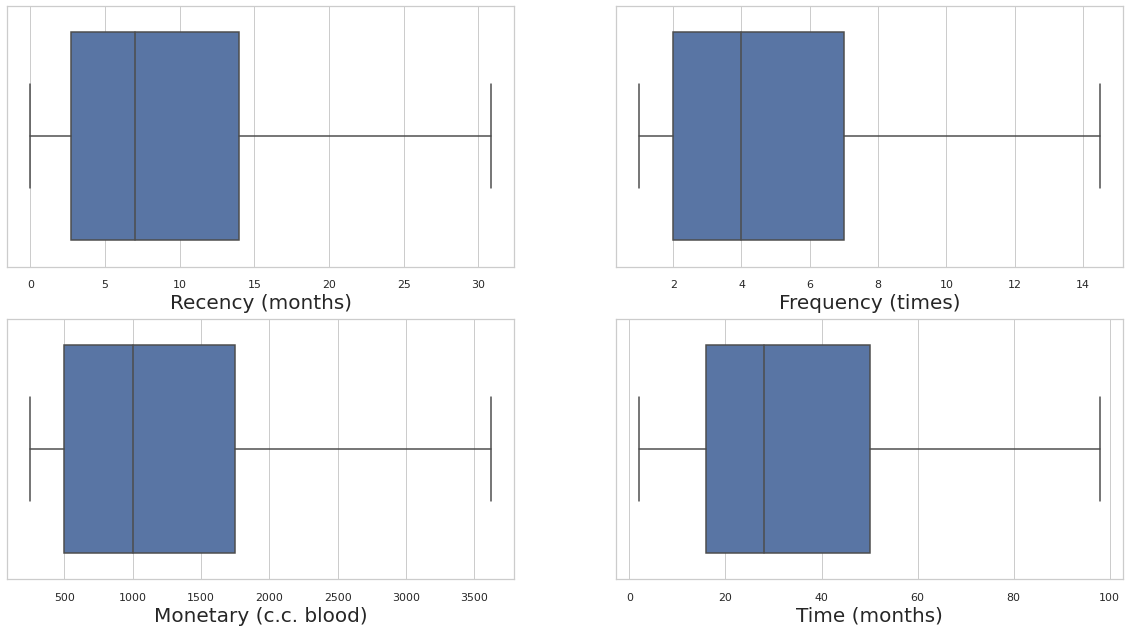

In [121]:
plt.figure(figsize=(20,45), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=5 :     # as there are 15 columns in the data
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [124]:
data["whether he/she donated blood in March 2007"].value_counts()

0    570
1    178
Name: whether he/she donated blood in March 2007, dtype: int64

In [125]:
data=pd.concat([data.reindex(columns = data.columns)], ignore_index = True)
data

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

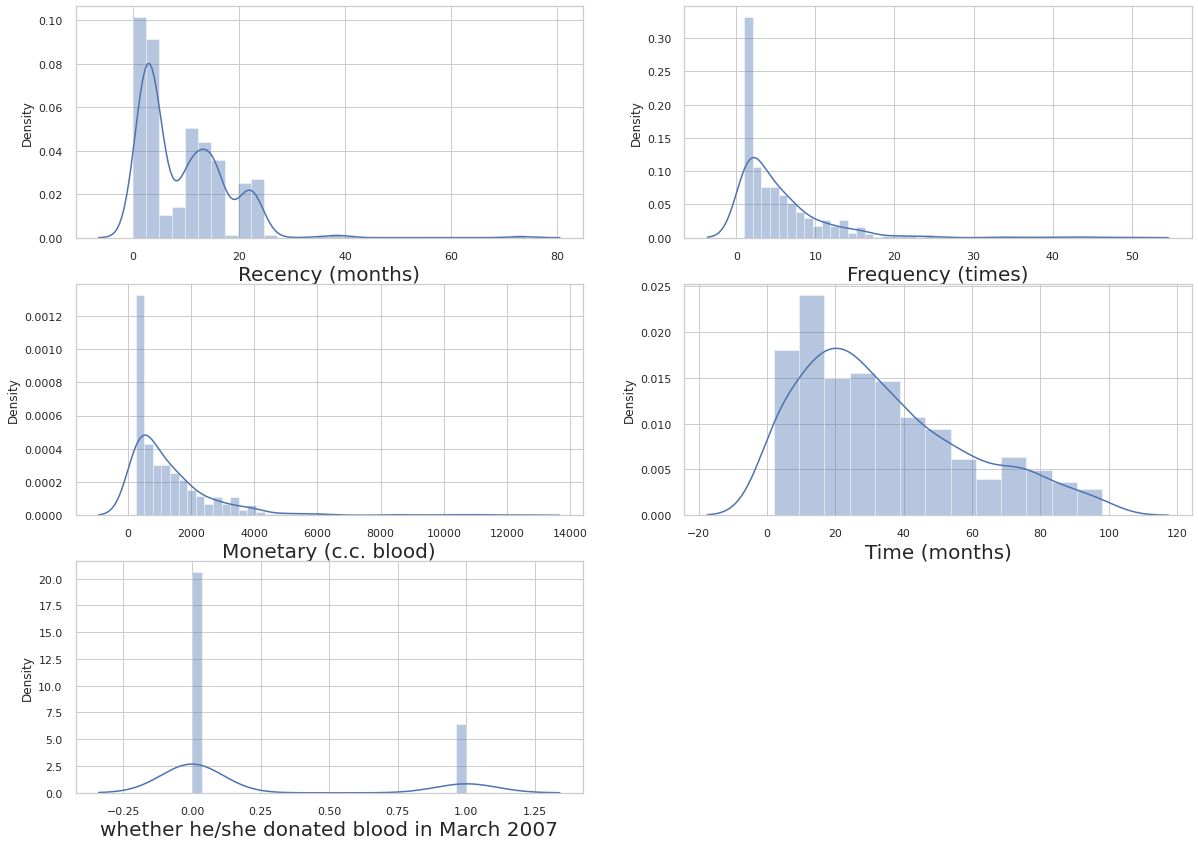

In [126]:
#ProfileReport(X)
# let's see how data is distributed for every column
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :     # as there are 15 columns in the data
        ax = plt.subplot(8,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

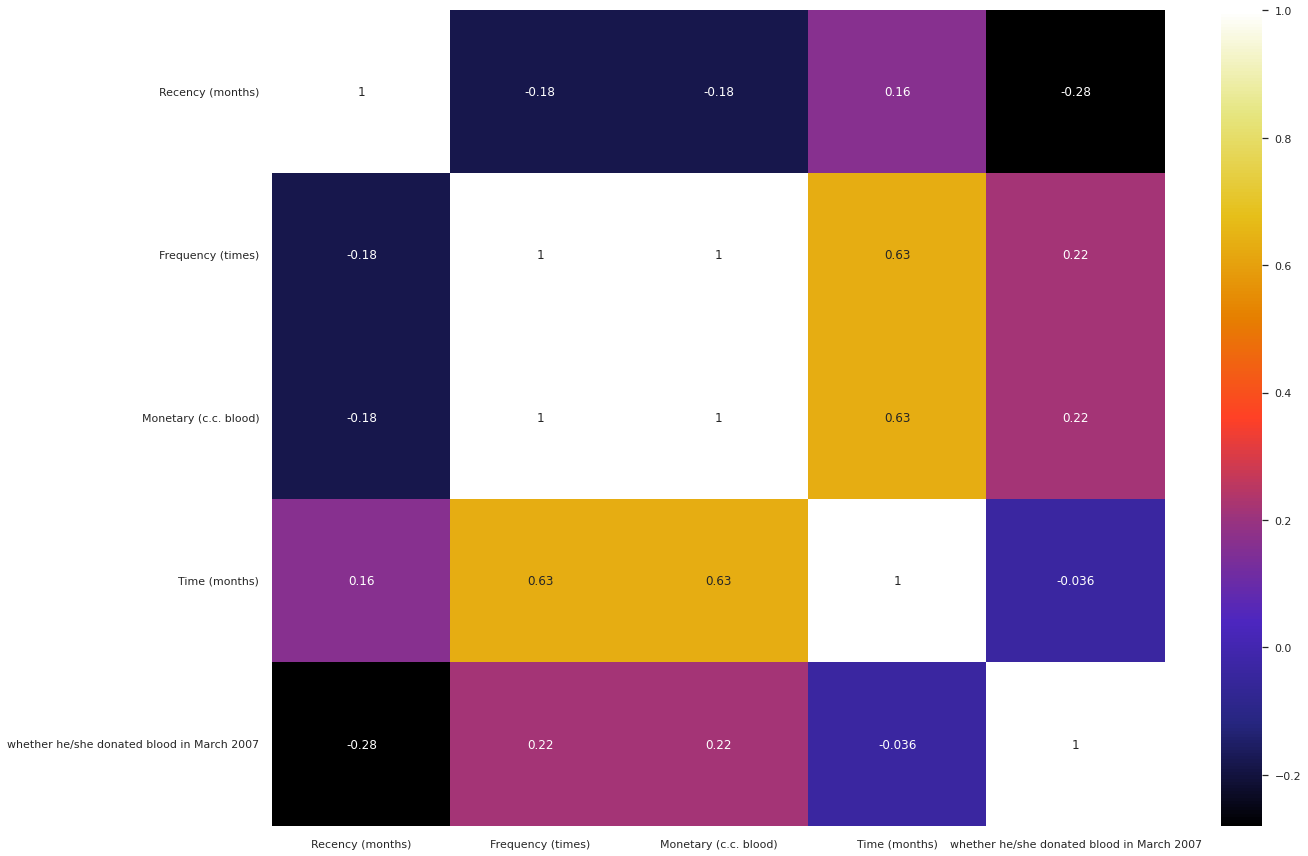

In [127]:
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(),cmap="CMRmap", annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x1080 with 0 Axes>

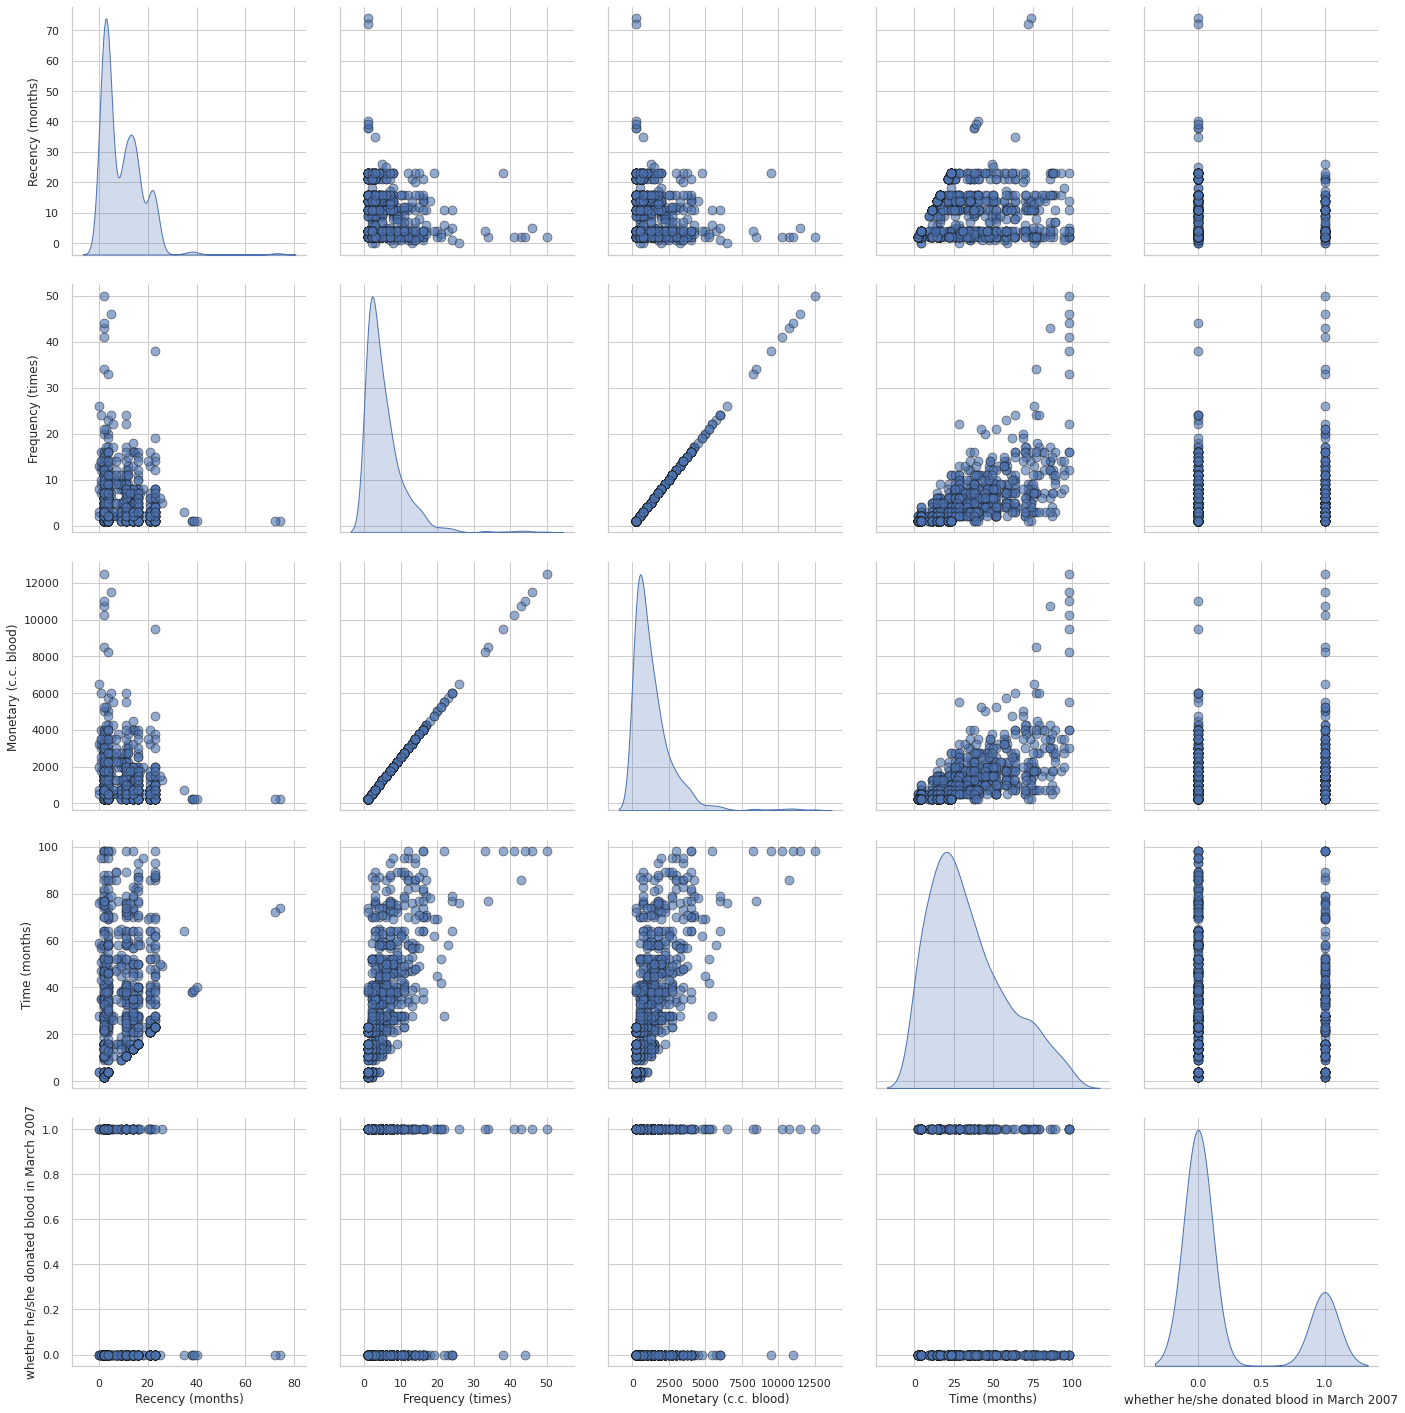

In [128]:
plt.figure(figsize=(15,15))
plt.suptitle('Multivariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.pairplot(data,  diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

In [116]:
X=data.drop(["whether he/she donated blood in March 2007"],axis=1)
Y=data["whether he/she donated blood in March 2007"]

In [170]:
X

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2.000,14.5,3625,98
1,0.000,13.0,3250,28
2,1.000,14.5,3625,35
3,2.000,14.5,3625,45
4,1.000,14.5,3625,77
...,...,...,...,...
743,23.000,2.0,500,38
744,21.000,2.0,500,52
745,23.000,3.0,750,62
746,30.875,1.0,250,39


In [171]:
Y

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: whether he/she donated blood in March 2007, Length: 748, dtype: int64

In [172]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
import os

In [173]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=30)

In [174]:
X_test

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
706,14.0,2.0,500,29
596,3.0,1.0,250,3
442,11.0,2.0,500,52
590,2.0,1.0,250,2
235,8.0,10.0,2500,63
...,...,...,...,...
129,2.0,2.0,500,10
158,2.0,1.0,250,2
224,4.0,1.0,250,4
622,4.0,4.0,1000,34


In [175]:
Y_test

706    0
596    1
442    0
590    0
235    0
      ..
129    1
158    0
224    1
622    1
269    0
Name: whether he/she donated blood in March 2007, Length: 150, dtype: int64

In [176]:
# Create a StandardScaler object
#scaler = StandardScaler()

In [177]:
#X_train=scaler.fit(X_train)

In [178]:
#X_test=scaler.fit_transform(X_test)

In [179]:
X_test

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
706,14.0,2.0,500,29
596,3.0,1.0,250,3
442,11.0,2.0,500,52
590,2.0,1.0,250,2
235,8.0,10.0,2500,63
...,...,...,...,...
129,2.0,2.0,500,10
158,2.0,1.0,250,2
224,4.0,1.0,250,4
622,4.0,4.0,1000,34


In [180]:
X_train

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
343,11.0,1.0,250,11
699,21.0,2.0,500,21
344,11.0,1.0,250,11
436,21.0,2.0,500,25
59,3.0,6.0,1500,21
...,...,...,...,...
430,9.0,2.0,500,52
145,4.0,3.0,750,16
140,2.0,9.0,2250,74
500,2.0,14.5,3625,86


In [181]:
classifier=LogisticRegression()
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [182]:
parameter

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
 'max_iter': [100, 200, 300]}

In [183]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [184]:
classifier_regressor.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [185]:
print(classifier_regressor.best_params_)  ## Best parameter

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [186]:
print(classifier_regressor.best_score_)  ## Best Score

0.7758543417366947


In [187]:
y_pred = classifier_regressor.predict(X_test)

In [188]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,Y_test)
print(score)

0.7933333333333333


In [212]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       142
           1       0.15      0.62      0.24         8

    accuracy                           0.79       150
   macro avg       0.56      0.71      0.56       150
weighted avg       0.93      0.79      0.84       150



In [190]:
conf_mat=confusion_matrix(y_pred,Y_test)

In [191]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [192]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7933333333333333

In [193]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8014184397163121

In [194]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9741379310344828

In [195]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8793774319066149

In [197]:
auc = roc_auc_score(Y_test, y_pred)
auc

0.5753042596348885

In [198]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

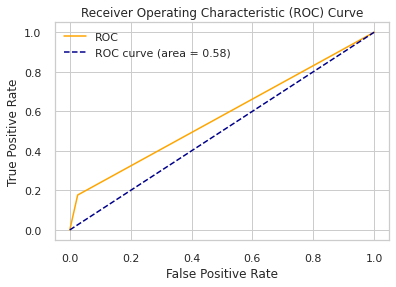

In [199]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [200]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()  ## Initialising

In [201]:
X_train=scaler.fit_transform(X_train)

In [202]:
X_test=scaler.transform(X_test)

In [203]:
X_test

array([[ 0.65606579, -0.77890077, -0.77890077, -0.22926634],
       [-0.85255585, -1.02619711, -1.02619711, -1.30101409],
       [ 0.24462353, -0.77890077, -0.77890077,  0.71881821],
       [-0.98970327, -1.02619711, -1.02619711, -1.34223515],
       [-0.16681874,  1.19946997,  1.19946997,  1.17224995],
       [ 0.93036064,  0.70487728,  0.70487728, -0.2704874 ],
       [ 0.24462353, -0.28430809, -0.28430809, -0.023161  ],
       [ 0.65606579, -1.02619711, -1.02619711, -0.84758235],
       [ 0.24462353,  0.45758094,  0.45758094,  0.1005022 ],
       [ 1.89039259, -0.77890077, -0.77890077, -0.35292954],
       [ 0.24462353,  0.45758094,  0.45758094,  1.13102888],
       [-0.98970327,  0.2102846 ,  0.2102846 , -0.2704874 ],
       [-0.71540843,  1.44676631,  1.44676631,  1.79056596],
       [ 1.61609775, -1.02619711, -1.02619711, -0.55903488],
       [ 0.51891837, -0.53160443, -0.53160443, -0.84758235],
       [-0.71540843,  0.2102846 ,  0.2102846 ,  0.71881821],
       [-0.71540843, -0.

In [204]:
X_train

array([[ 0.24462353, -1.02619711, -1.02619711, -0.97124555],
       [ 1.61609775, -0.77890077, -0.77890077, -0.55903488],
       [ 0.24462353, -1.02619711, -1.02619711, -0.97124555],
       ...,
       [-0.98970327,  0.95217363,  0.95217363,  1.62568169],
       [-0.98970327,  2.31230351,  2.31230351,  2.1203345 ],
       [ 0.93036064, -0.77890077, -0.77890077, -0.31170847]])

In [205]:
classifier=LogisticRegression()
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [206]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [207]:
classifier_regressor.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [208]:
print(classifier_regressor.best_score_)  ## Best Score

0.7792016806722689


In [209]:
y_pred = classifier_regressor.predict(X_test)

In [211]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,Y_test)
print(score)

0.7866666666666666


In [213]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       142
           1       0.15      0.62      0.24         8

    accuracy                           0.79       150
   macro avg       0.56      0.71      0.56       150
weighted avg       0.93      0.79      0.84       150



In [214]:
conf_mat=confusion_matrix(y_pred,Y_test)

In [215]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [216]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7866666666666666

In [218]:
from sklearn.svm import SVC

In [220]:
svm = SVC(random_state = 1)
svm.fit(X_train, Y_train)

acc = svm.score(X_test,Y_test)*100
accuracies = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 76.67%


In [221]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




# Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Train the decision tree classifier on the training data
clf.fit(X_train, Y_train)

# Use the trained decision tree classifier to make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(Y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.7266666666666667


In [222]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Create an XGBClassifier object
clf = xgb.XGBClassifier()

# Train the XGBClassifier on the training data
clf.fit(X_train, Y_train)

# Use the trained XGBClassifier to make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(Y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.7866666666666666
